## Name : Madhapur Vineelaswathi
## ID : 108998406

Loading the dataset

In [1]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import pandas as pd
from sklearn import datasets

In [2]:
newdf=pd.read_csv("Weather_2009_2016.csv")
newdf.head()

,Date Time,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,-8.02,996.52,-8.90,93.3,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,-8.41,996.57,-9.28,93.4,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,-8.51,996.53,-9.31,93.9,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,-8.31,996.51,-9.07,94.2,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,-8.27,996.51,-9.04,94.1,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# <font color=orange>1.Calculating Linear Regression</font>

here we are supposed to calculate more than one predictor

                    𝐲=𝑐+𝑎1𝐱1+⋯+𝑎10𝐱10

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
train_set, test_set = train_test_split(newdf, test_size=0.2, random_state=42)
newdf1=train_set.copy()
newdf1.describe()

,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000,336440.000000
mean,9.446557,989.223403,4.950543,76.003139,4.043761,6.020227,9.636744,1216.093556,1.624439,2.996377,174.745310
std,8.426450,8.358900,6.731364,16.487523,4.899227,2.655262,4.234012,39.984531,71.106856,73.198718,86.700237
min,-23.010000,913.600000,-25.010000,12.950000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,3.350000,984.210000,0.230000,65.190000,0.870000,3.920000,6.280000,1187.510000,0.990000,1.760000,124.800000
50%,9.420000,989.590000,5.210000,79.300000,2.190000,5.590000,8.960000,1213.770000,1.760000,2.960000,198.100000
75%,15.470000,994.740000,10.060000,89.500000,5.300000,7.800000,12.480000,1242.870000,2.860000,4.730000,234.200000
max,37.280000,1015.350000,23.110000,100.000000,46.010000,18.130000,28.820000,1393.540000,14.630000,23.500000,360.000000


**Finding the correlations between columns**

In [5]:
newdf1.corr()

,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Temperature (degC),1.000000,-0.045002,0.895582,-0.572855,0.761838,0.866649,0.867071,-0.963430,-0.005408,-0.003467,0.039231
Pressure (mbar),-0.045002,1.000000,-0.066150,-0.017777,-0.003539,-0.069560,-0.069600,0.307215,-0.005393,-0.007446,-0.062870
Tdew (degC),0.895582,-0.066150,1.000000,-0.156899,0.435663,0.967608,0.968054,-0.885064,-0.009284,-0.009516,0.050184
rh (%),-0.572855,-0.017777,-0.156899,1.000000,-0.843937,-0.151157,-0.151286,0.514933,-0.004343,-0.009276,-0.016567
VPdef (mbar),0.761838,-0.003539,0.435663,-0.843937,1.000000,0.448572,0.448620,-0.698517,0.001308,0.004843,-0.030520
sh (g/kg),0.866649,-0.069560,0.967608,-0.151157,0.448572,1.000000,0.999997,-0.853285,-0.010079,-0.010601,0.019749
H2OC (mmol/mol),0.867071,-0.069600,0.968054,-0.151286,0.448620,0.999997,1.000000,-0.853729,-0.010077,-0.010598,0.019983
rho (g/m**3),-0.963430,0.307215,-0.885064,0.514933,-0.698517,-0.853285,-0.853729,1.000000,0.004003,0.001733,-0.058442
wv (m/s),-0.005408,-0.005393,-0.009284,-0.004343,0.001308,-0.010079,-0.010077,0.004003,1.000000,0.971739,-0.016414
max. wv (m/s),-0.003467,-0.007446,-0.009516,-0.009276,0.004843,-0.010601,-0.010598,0.001733,0.971739,1.000000,-0.015362


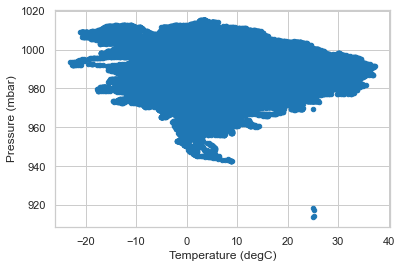

In [6]:
newdf1.plot.scatter(x='Temperature (degC)',y='Pressure (mbar)')

Poltting an Regression plot for us to visualize things

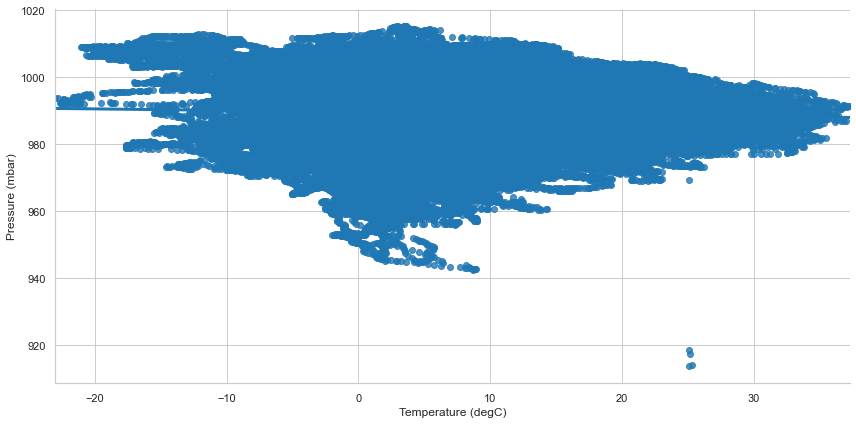

In [8]:
sns.lmplot('Temperature (degC)','Pressure (mbar)',data=newdf1,height=6, aspect = 2)

Building our model by making some changes to our training set

In [9]:
train_set_full=train_set.copy()
train_set=train_set.drop(["Pressure (mbar)"],axis=1)
train_labels=newdf1["Pressure (mbar)"]
lin_reg=LinearRegression()
lin_reg.fit(train_set, train_labels)
print("Coefficients: ", lin_reg.coef)
print("Intercept: ",lin_reg.intercept_)

ValueError: could not convert string to float: '06.01.2016 06:30:00'

# <font color = orange>2.HeatMap for the Diagonal Matrix</font>

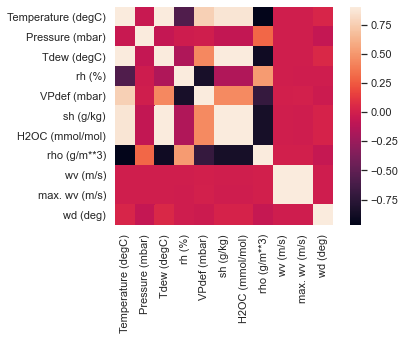

In [11]:
corrmat = newdf.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

# <font color=Orange>3.Multiple Variables with Scatter Plot </font>

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
cols=['Temperature (degC)','Pressure (mbar)','Tdew (degC)','rh (%)']
sp=sns.pairplot(newdf[cols],size=1.8,aspect=1.8,plot_kws=dict(edgecolor='K',linewidth=0.5)diag_kind='kde',diag_kws=dict(shade=True))
fig=sp.fig
fig.subplots_adjust(top=0.93,wspace=0.3)

SyntaxError: invalid syntax (<ipython-input-12-f810f6fcff1a>, line 4)